### 캐글즐기기 파트4 * Bayesian Statistics: Techniques and Models

### link : https://www.coursera.org/learn/mcmc-bayesian-statistics
### (베이지안) Course Overview - 이상열

### Code : https://www.coursera.org/learn/mcmc-bayesian-statistics/supplement/wnOz5/code-for-lesson-3

### Module Overview
### 1.  Statistical Modeling
    - 1.Objectives
    - 2.Modeling process
    - Quiz
### 2. Bayesian Modeling
    - 1. Components of Bayesian models
    - 2. Model specification
    - 3. Posterior derivation
    - 4. Non-conjugate models
    - Quiz
### 3. Monte Carlo Estimation
    - 1. Monte Carlo integration
    - 2. Monte Carlo error and marginalization
    - 3. Computing examples
    - 4. Computing Monte Carlo error
    - Quiz
### 4. Background: Markov chains
    - Quiz


### Module Overview
- 여러 변수가 포함 된 실제 데이터에는 현실적인 결론에 도달하기 위해 더 복잡한 모델이 필요합니다.
- 우리가 보다 폭넓게 적용 할 수있는 모델을 만날 때. 우리는 그것들에 적합한 첨단의 계산 기술이 필요합니다.
- 마르코프 체인 몬테 카를로 소개합니다. 분석 방법이 없는 posterior distribution에서 표본 추출을 허용하는 MCMC 방법이라고도합니다.

    1. 첫 번째 모듈에서는 통계 모델링에 대해 논의하고 베이지안 관점에서 문제에 접근하는 방법을 검토합니다.
    2. 두 번째 모듈은 MCMC를 소개하는 데 전념합니다. 베이지안 통계를 주류로 가져온 두 가지 알고리즘을 설명하고 시연합니다.
    3. 세 번째 모듈에서는 실제 데이터를 모델링하기 시작합니다. 선형 및 로지스틱 회귀를 포함한 가장 일반적인 통계 모델을 보여줍니다.
    4. 네 번째 모듈에서는 계정 데이터에 대한 회귀 분석을 살펴 보겠습니다. 또한 상관 관계가 있는 데이터를 처리하는 방법으로 계층 모델링을 도입 할 것입니다.
    5. 마지막 모듈은 과제에만 포함됩니다. 이 과제는 운전석에 앉게 합니다. 이 두 과정에서 작성한 모든 부분을 모아 선택한 프로젝트에 대해 자신의 데이터 분석을 수행 할 수 있습니다.

## 1. Statistical Modeling
### 1-1 Objectvies

- 통계 모델의 목표는 무엇입니까?
- 통계는 과학적으로 의사 결정을 할 수 있는 결론을 도출하기 위해 데이터를 계획, 수집 및 분석하는 전 과정에 관련됩니다.
- 통계 모델은 수학적 구조를 모방하는 데 사용되며 근사치, 데이터 생성 프로세스입니다.

<img src="img/bayes1_4.png" width="500" height="200"/>

- 가능성이있는 유권자 샘플을 대상으로 한 설문 조사를 고려해보겠습니다. 조사 대상자의 57%가 특정 후보자를 선호한다고 가정해봅시다.
    - 이 결과를 제시 할때, 57%의 숫자에서 내가 얼마나 확신하는지 물어보는 것이 자연스럽다.
    - 그것은 모든 사람들의 57%가 그 후보자를 선호한다는 것을 의미합니까?
    - 예를 들어 여론 조사가 얼마나 잘 수행되었는지와 관련된 몇 가지 다른 질문에 따라 다릅니다.
    - 참가자들은 어떻게 선정되었습니까? 얼마나 많은 사람들이 투표에 참여 했습니까?
    - 무작위로 선발 된 다른 유권자 표본에 대한 설문 조사를 반복하면 57%의 숫자가 어떻게 변경 될 수 있습니까?

- 확률 이론을 사용하여이 추정치를 둘러싼 불확실성을 설명 할 수 있습니다.

<img src="img/bayes1_11.png" width="500" height="200"/>

- 우리가 이야기 할 첫 번째 것은 **불확실성을 정량화** 하는 것입니다.
    - 통계 분석가가 설문 조사 데이터를 분석하여 99%의 신뢰도로 후보자를 선호하는 모든 시민의 진정한 비율은 51 ~ 63 %라고 결론내린다고 가정합니다. 그것은 조금 더 유익한 것입니다. 이와 같은 범위는 얼마나 신뢰할 수 있는지를 알려줍니다.

- 우리가 이야기 할 두 번째 목표는 **추론** 입니다.
    - 폴링 예에서 우리는 후보자를 지지하는 샘플의 사람들 중 일부만 알고 있습니다.
    - 통계 모델은 결과를 확장하고 전체 인구 중 몇 퍼센트가 후보자를 지지하는지를 추측하는 데 도움이됩니까?
    - 우리는 설문 조사에서 각 사람에 대한 다른 인구 통계학적 정보를 가지고 있을 수도 있습니다. 통계 모델을 통해 우리는 이러한 다른 변수들이 후보자를 지지 할 가능성에 어떻게 관련되는지를 알 수 있습니다.

- 다음 목표는 가설에 대한 **데이터의 증거** 를 측정하는 것입니다
    - 폴링 예에서 전문가가 후보자가 여성보다 남성에게 더 많이 사용된다고 가정합니다.
    - 다행히도 우리는 설문 조사 결과를 더 자세히 분석했습니다. 여성의 55 %가 후보자를 찬성하고 남성의 59%가 후보자를 찬성한다고 가정 해봅시다.

- 우리가 말하려고 하는 네 번째이자 마지막 모델링 목표는 **예측** 입니다.
    - 폴링 예제에서 특정 유권자에 대한 인구 통계학적 정보가 있다고 가정합니다.
    - 그러나 우리는 그녀가 어떤 후보자를 지지하는지 모른다. 통계 모델을 사용하여 그녀에 대해 알려진 내용을 사용하여 투표 선택을 정확하게 예측할 수 있습니다.
    - 통계 모델링은 데이터 과학에 많은 기여를 한다는 것이 분명합니다. 이 분야의 또 다른 분야는 기계학습입니다.      
    - 기계학습은 통계적 모델링과 어떤 관련이 있습니까? 광범위하게, 기계 학습은 알고리즘을 사용하는데, 그 중 일부는 통계적 모델로 공식화되거나 공식화되어 고도화된 예측을 생성합니다. 즉, 기계학습은 이 네 번째 목표를 전문으로 하며 탁월합니다.

- 물론 누가 현실적인 예측을 하지 못하는 모델을 믿을 것입니까? 목표 4는 거의 항상 중요하지만 반드시 모든 것에 대답하는 것은 아닙니다.

### 1-2 Modeling Process

- 프로세스의 첫 번째 단계는 **문제를 이해**하는 것입니다.
    - 예를 들어 상점 체인의 여러 위치에서 알 수 없는 위치의 수익 데이터가 있다고 가정합니다.
    - 이러한 매출 수치를 매장 운영 방식에 대한 요약으로 평균하는 것이 합리적입니다.- 
    - 매장이 다른 국가에 있고 수익이 다른 통화로 보고 되었다고 가정 해 보겠습니다.
        - 이제 그 평균은 많은 의미를 가지지 않는 것 같습니다. 물론 수익 수치를 같은 스케일로 변환하지 않으면 말이죠.


- 두 번째 단계는 **관련 데이터를 계획하고 올바르게 수집**하는 것입니다.
    - 질문에 대한 답변을 위해 잠재적으로 측정할 수 있는 수량이 여러 개 있을 수 있습니다.
    - 이 단계에서는 문제를 해결하는 데 가장 유용한 정보를 결정합니다. 


- 세 번째 단계는 **데이터를 탐색** 하는 것입니다.
    - 이 단계에서는 데이터 수집 계획을 준수했는지 확인해야 합니다. 그리고 데이터가 정확하게 기록되었습니다. 해당 데이터에 오류가 없을 시 중요한 surpises가 발견되면 평가해야 함.
    - 이 단계에서는 종종 변수 간의 관계에 대한 기본적인 이해를 얻기 위해 데이터를 시각화하려고 합니다. 이렇게하면 어떤 종류의 모델이 적합한 지 결정하는 데 도움이됩니다.

<img src="img/bayes1_25.png" width="500" height="200"/>

- 네 번째 단계는 **모델을 가정**하는 것입니다.
    - 데이터가 어떻게 구성되어 있는지 이해한 후에는 흥미로운 데이터 내용을 적절히 요약하거나 요약할 수있는 모델을 선택하십시오. 이것은 회귀와 같은 통계 모델이 아니거나 성장 모델과 같은 과학적 이론을 기반으로 할 수도 있습니다.

- 다섯 번째 단계는 **통계 모델링의 맞추는(적합하는)** 것입니다.
    - 이 단계에서 데이터를 사용하여 모델의 매개 변수를 추정해야합니다. 이 특정 클래스에서 우리는 이 때에 **베이지안 접근법**을 취할 것입니다.

- 여섯 번째 단계는 **모델을 점검** 할 것입니다.
    - 여기서 모델이 데이터 생성 프로세스를 적절하게 모방하는지 확인하려고 합니다.
    - 모델 예측이 현실적입니까? 데이터에 잘 맞습니까? 아니면 완전히 기능 중 몇 개 일부를 놓쳤습니까?
    - 우리는 과정의 뒷부분에서 잔차 분석과 예측 검사를 포함하여 이것을 수행하는 기법을 살펴볼 것입니다.

<img src="img/bayes1_26.png" width="500" height="200"/>

- 일곱 번째 단계는 우리는 **반복**할 것입니다.
    - 즉, 4 ~ 6 단계로 돌아가십시오. 이미 맞춘 모델이 웬일인지 부적절한 경우 4 단계로 돌아가서 6 단계를 진행하여 새롭고 더 나은 모델을 제시해야합니다. 이전 모델의 결함을 해결하거나 수정합니다.

- 최종 여덜 번째 단계는 모델을 **사용**할 것입니다.
    - 이러한 충분한 시간을 반복하여 모델이 좋았거나 적절한 모델을 선택했다면 결과를 사용하여 원래의 연구 질문에 답하고 결론에 도달 할 수 있습니다.

<img src="img/bayes1_28.png" width="500" height="200"/>

## 2. Bayesian Modeling
### 2-1 Components of Bayesian models

- 확률 분포와 데이터 모델을 지정합니다. 우리가 뮤와 시그마의 value를 안다면 또한 원래 데이터 세트와 유사하게 동작하는 더 많은 가짜 데이터를 생성하는 방법을 제시합니다.
    - 모델은 여기에 있는 것과 같이 간단할 수도 있고 데이터의 behavior을 포함하여 필요한 만큼 복잡하고 정교 할 수도 있습니다.

<img src="img/bayes2_5.png" width="500" height="200"/>


- 지금까지 모델은 Frequentists나 Bayesians에게 동일합니다. 이전 과정에서 회상 해 볼 수 있습니다.
- 추정치의 불확실성을 계산합니다. Frequentist은 mu 및 sigma의 추정치가 얼마나 많이 변할지 고려할 것입니다.
    - 만약 우리가 샘플링 과정을 반복하고, 15 명의 남성, 이상, 또 다른 샘플을 얻는다면.

- 베이지안 접근법,이 수업에서 우리가 취할 것입니다. 확률로 μ와 σ 제곱의 불확실성을 직접 해결합니다. 
    - **μ와 σ의 확률 분포로 무작위 변수**로 취급함으로써.


<img src="img/bayes2_11.png" width="500" height="200"/>

- 우리가 자주 작업하는 베이지안 모델의 세 가지 기본 구성 요소는 **the prior and the posterior. The likelihood** 
    - prior의 다음 단계는 매개 변수 theta를 사용하여 불확실성을 특성화하는 확률 분포입니다.
    - 우리는 알려진(데이터, 미지수)에 대해서 매개 변수에 대한 joint probability model을 갖습니다. 우리는 확률의 Chain Rule을 사용해 확인할 수 있습니다.

- 우리가 데이터와 매개 변수 세타의 joint probability를 원한다면. 우리는 joint probability가 필요하지 않습니다. 우리가 필요로 하는 것은 사후 분포입니다.
    - 사후 분포는 y에 theta의 조건부의 분포입니다.

- 조건부 확률의 법칙을 사용하여 특히 Bayes의 정리를 사용하여 식을 바로 구할 수 있습니다.
- 보다 진보 된 베이지안 모델링을 사용하면 어떤 것이든 사용할 수 있습니다. 사후 분포는 수업 1에서 통계적 모델링 목표를 달성하기위한 주요 도구입니다.


### Quiz
Whereas non-bayesian approaches consider a probability model for the data only, the hallmark characteristic of bayesian models is that they specify a joint probability distribution for both data and parameters. How dows the bayesian paradigm leverage this additional assumption?

1. This allows us to select the most accurate prior distribution.

2. This allows us to make probabilistic assessments about how likely our particular data outcome is under any parameter setting.

3. This allows us to use the laws of conditional probability to describe our updated information about parameters given the data.

4. This allows us to make probabilistic assessments about hypothetical data outcomes given particular parameters values.


## 2. Bayesian Modeling
### 2-2 Model specification

<img src="img/bayes3_2.png" width="500" height="200"/>

- 베이지안을 구성하는 한 가지 편리한 방법은 모델의 **계층적 폼**으로 구성하는 것. 계층 구조란 모델이 단계적으로 또는 계층적으로 지정되었음을 의미합니다.
    - 일반적으로 데이터 모델 또는 likelihood을 직접 시작

<img src="img/bayes3_3.png" width="500" height="200"/>

- 파라미터의 조건이 있을 때 yi는 정규 분포이고 독립적이고 동일하게 분포로부터 왔으며 정규 분포는 평균 μ와 분산 σ 제곱 (iid)
    - prior 분포가 독립이다. 
    - prior 분포가 독립이라고 가정 할 때 posterior distribution의 dependent를 얻을 수 있음.
    - 우리가 σ 제곱의 값을 알고 있다면 (정규 분포, mu가 알려질 때) 시그마 제곱에 앞서 켤레 분포는 역 감마 분포입니다
    - 역 감마 분포에는 두 개의 매개 변수가 있습니다. 그것은 형태 파라미터를 가지고 있습니다. 우리는 그것을 0이라고 부르고 스케일 인자는 베타이라고 부를 것입니다. 물론이 하이퍼 파라미터이며 값을 선택해야 합니다. 그러나 우리는 이제 완벽한 베이지안 모형을 가지고 있습니다.


- 켤레 사전분포 (Conjugate priors : http://blog.acronym.co.kr/437)


<img src="img/bayes3_6.png" width="500" height="200"/>

- 모델을 작성하는 또 다른 유용한 방법은 **그래픽 표현**을 사용하는 것입니다.
    - 그래픽 표현에서 우리는 노드라고 불리는 것을 그린다. 그래서 이것은 mu의 노드가 될 것이다.
    - 원은 이것이 자신의 분포를 갖는 임의의 변수라는 것을 의미합니다.
    - 이것들은 임의의 변수이기도 하므로, 이것들을 노드로서 작성합니다. 이 노드를 관찰하면 데이터에서 노드를 볼 수 있습니다.
    - 음영 처리가 되어 있는 경우 (보통 경우)는 관찰 된 것을 의미합니다. 화살표는 확률 변수와 분포 사이의 의존성을 나타냅니다.

- 교환 가능한 확률 변수를 작성하여 그래픽 모델을 단순화 할 수 있으며 나중에 **교환 가능**으로 정의 할 것입니다.
    - 이와 같은 모델을 작성하려면, 우리는 ys가 교환 가능하다고 가정해야합니다
    - 계층 구조 및 그래픽 표현 모두이 모델의 데이터를 가상으로 시뮬레이션 할 수있는 방법을 보여줍니다.

<img src="img/bayes3_8.png" width="500" height="200"/>

## 2. Bayesian Modeling
### 2-3 Posterior derivation

<img src="img/bayes4_2.png" width="500" height="200"/>

- 이전에는 두 단계로 모델을 그렸습니다. 그러나 실제로는 더 많은 레이어를 추가하는 것을 막을 수 없을 것. 우리는 이러한 유형의 계층 적 모델을 과정의 뒷부분에서 심도있게 검토 할 것입니다.
    - 다음 단계는 뮤 및 시그마 제곱에 대한 독립적인 사전 작성자를 수행하는 대신 mu가 시그마 제곱 값에 따라 달라지도록 합니다.
    - 그리고 이전의 분산은 시그마 제곱이 될 것입니다.이 매개 변수는 오메가 제로로 나눕니다. 그것을 확장할 또 다른 하이퍼 매개 변수입니다.
    - 마지막 하이퍼 매개 변수와 동일한 표준 역 감마를 사용하는 방법이 없습니다.
    - 예를 들어 이전 세그먼트의 하이퍼 매개 변수에 대한 값을 수정하는 대신 하이퍼 매개 변수는 무언가, σ naught, 뉴트 매듭 및 베타 매듭이었습니다.

<img src="img/bayes4_3.png" width="500" height="200"/>

- 이 모델에는 3 개의 레이어가 있습니다.
    - 우리는 다른 것에 의존하지 않는 변수로 시작합니다. 그래서 그것은 시그마 제곱이되고 사슬을 따라 움직일 것입니다. 그래서 여기서, 다음 변수는 시그마 제곱에 의존하는 mu입니다.
    - 우리는 yi가 관찰되고 데이터가 교환 가능하기 때문에 이중 원을 사용합니다. 여기에 1 ~ n의 숫자를 넣으십시오.
    - yi의 분포는 mu와 sigma 제곱에 따라 다르므로 그 부분을 연결하는 커브를 그릴 것입니다.

<img src="img/bayes4_6.png" width="500" height="200"/>

- 이 모델의 가상 데이터를 시뮬레이션하려면 먼저 시그마 제곱에 대한 사전 분포를 가져야합니다.
- 모델 사양을 얻은 후에는 데이터가 주어진 것처럼 모든 매개 변수에 대해 전체 사후 분포가 무엇인지 쓸 수 있습니다.
    - Mu가 주어진 시그마 제곱의 조건부 사전은 또한 정상입니다. 그래서 이것을 mu의 정규 분포로 곱할 것입니다. mu의 매개 변수는 무언가이며 omega naught보다는 sigma 제곱입니다.
    - 마지막으로 시그마 제곱에 대한 사전 조건이 있습니다. 우리는 하이퍼 파라미터가 주어지지 않았을 때 시그마 제곱에 대한 역 감마의 밀도를 곱할 것입니다. 미안합니다. 하이퍼 파라미터는 무시되고 베타는 제로입니다.


<img src="img/bayes4_9.png" width="500" height="200"/>

- 우리가 바로 여기있는 것은 모든 것의 joint probability입니다. (베이즈 정리의 분자)
    - 우리는 주어진 데이터의 사후 분포
    - 즉,이 특정 모델에 대해 이미 작성한 것은 모든 데이터를 고려할 때 μ 및 σ 제곱의 사후 분포에 비례합니다.
    - 이 표현식에서 누락 된 유일한 것은 표현식이 1로 통합되도록 하는 상수입니다.
    - 이것은 이전 코스의 모든 모델에 해당됩니다. 그러나 우리가 공역 사전을 사용하지 않거나 모형이 더 복잡하다면 사후 분포는 우리가 인식 할 수있는 표준 형태를 가지지 않을 것입니다.

## 2. Bayesian Modeling
### 2-5 Non-conjugate models

- 나이스하고 깨끗한 사후 분포가 없는 모델의 몇 가지 예를 들어 봅시다.

<img src="img/bayes4_14.png" width="500" height="200"/>

- 지금 우리는 알려진 분산이 1인 정규 분포로부터 독립적인 측정이지만, 알 수 없는 평균이라고 가정할 것입니다
    - 평균 mu를 사용하여 정상적으로 배포되며, 분산 1을 사용하려고 합니다. 이 경우 알 수없는 평균은 이 특정 산업의 성장을 나타낼 수 있습니다.
    - 그러나 우리가 이전에 mu에 대해 믿는 것이 1 자유도의 표준 t 분포를 사용하여 더 잘 반영된다고 결정했다고 가정 해 봅시다. 그래서 우리는 mu가 t 분포가 되기 전에 그것을 쓸 수 있습니다.
    - mu의 사후 분포는 이전의 likelihood 시간에 비례한다는 것을 상기하자. 이 모델에 대한 표현을 작성해 보겠습니다. 그것은 데이터 y1에서 yn이 주어진 mu에 대한 사후 분포이다.
    - E를 negetaive 1/2로 설정하십시오.
    - This is the likelihood times the prior. 우리가 여기에 약간의 대수학을 한다면, 우선 우리는 이것을 비례합니다.

<img src="img/bayes4_15.png" width="500" height="200"/>

- 따라서, 표현식으로 곱해지는 상수는 중요하지 않습니다. 그래서, 2파이의 제곱근은 n번 곱해지고, 단지 상수가 생성되고,이 파이는 여기에 상수를 만듭니다. 우리는 다음 단계로 그것들을 떨어 뜨릴 것입니다.
    - 이것은 비례적이기 때문에이 부분을 제거하고 이제는 지수의 속성을 사용할 것입니다.
    - 지수의 곱은 지수화된 부분의 합입니다. 그래서 우리는 1에서 n까지의 i의 마이너스 1/2의 지수를 가집니다. 이 마이너스 마이의 제곱입니다.
    - 그리고 나서 우리는 파이를 여기에 떨어 뜨렸습니다. 그래서 1 곱하기 mu 더하기.
    - 우리는 이 부분을 더 잘 표현하기 위해 여기서 대수의 몇 가지 단계를 수행 할 것입니다. 그러나 우리는 그걸 건너 뛰겠습니다. 이제 마지막 두 표현식을 추가했습니다.

- 우리는 사후 분포가 일정하다는 것을 알고 있지만, 우리는 그 분포를 표준 분포로 인식하지 못합니다. 우리는 통합하거나 시뮬레이션 할 수 있으므로 다른 작업을해야합니다.

<img src="img/bayes4_16.png" width="500" height="200"/>

- 두 개의 매개 변수 예제에서 우리는 normal likelihood를 가지고 있는 경우로 돌아갈 것입니다. 그리고 우리는 이제 mu와 sigma 제곱을 추정 할 것입니다. 왜냐하면 둘 다 알려지지 않았기 때문입니다.
    - 시그마 제곱이 알려졌다면 mu 이전의 공액은 정규 분포 일 것임을 상기하십시오. mu가 알려졌다면 우리가 시그마 제곱을 선택할 수 있는 prior의 접합은 역 감마입니다.
    - 이전에 mu에 시그마 제곱을 포함시키고 앞에서 설명한 계층적 모델을 사용하면 그 모델은 공액을 가지며 닫힌 폼 솔루션을 갖게됩니다

- Bayesian은 수년간 통계의 주요 흐름을 입력하는 방법을 사용합니다. 가장 단순한 문제만 다루기 쉽기 때문입니다.

## 3. Monte Carlo Estimation
### 3-1 Monte Carlo integration

- 복잡한 사후 분포로부터 어떻게 시뮬레이트 하는 지를 배우기 전에. 몬테 카를로 추정의 기본 사항 중 일부를 살펴보겠습니다.
- 몬테 카를로 추정은 확률 분포로부터 가설적인 추측을 시뮬레이션하는 것을 말한다. (분포의 중요한 양을 계산하기 위해서)

<img src="img/bayes5_3.png" width="500" height="200"/>

- 이 분포의 평균을 계산하려면 다음 적분 값을 계산해야합니다.
    - 세타의 기대 값은 세타의 전체 공간에 대한 적분과 같습니다.
    - 그러나 우리는 몬테 카를로 추정을 사용하여이 해답을 검증 할 수있다.

<img src="img/bayes5_5.png" width="500" height="200"/>

- 우리는 이 감마 분포로부터 이것을 시뮬레이션 할 것입니다.
    - 우리는 샘플 평균 또는 이 평균의 평균을 취할 것입니다.
    - 이들 샘플의 평균은 확률로 큰 수(Law Of Large Number)의 법칙에 의해 그 분포의 진정한 평균으로 수렴합니다.
    - Theta 스타. 이 샘플 평균은 대략 정규 분포를 따르고 있습니다.
    - 그리고 그것의 분산은 배포판의 진정한 분산을 샘플 크기 인 m으로 나눈 값입니다.
    - Theta의 이론적인 분산은 다음 적분입니다.
    - 예상 값과 마찬가지로 Theta의 분산은 우리가 여기서 한 것입니다. 우리는 Theta의 기대 값에서 기대 값의 제곱을 뺀 값을 계산하고 있습니다.
    

<img src="img/bayes5_12.png" width="500" height="200"/>

- 몬테카를로 추정의 이 방법은 많은 다른 적분을 계산하는 데 유용 할 수 있습니다. 
    - 예를 들어, theta의 h가 theta의 함수이고, 다음 적분을 계산하려고 한다고 가정 해 봅시다. theta의 h 배의 theta의 밀도, dta. 이 적분은 정확히 세타 인의 기대 값에 의해 의미되는 것입니다.
    - 우리가 시뮬레이션 한 theta 샘플 각각에 대해 h 함수를 계산합니다.
    - 이 양은 이 적분 값 인 예상 값을 근사화합니다.
    - 이러한 h 함수의 한 가지 유용한 예는 이와 같이 작성된 표시기 함수입니다.

- 예를 들어, 세타의 h가 세타가 5보다 작은 지표라고 가정 해 봅시다.
    - 여기서 이 함수는 theta가 5보다 작으면 1을, 그렇지 않으면 0을 반환합니다. 그래서 예상되는 가치는 무엇입니까?
    - 이것은 theta가 감마 분포에서 나온다고 가정 할 때, 다시 0에서 무한대까지의 계급입니다.
    - theta의 h의 예상 값은 theta의 h이며, theta의 밀도에 곱한 것입니다.

- 그래서 만약 우리가 이것을 평가한다면,이 함수는 1이 될 것입니다. theta가 0과 5 사이라면, 0에서 5 사이입니다. theta 밀도의 1 배입니다.
    - 단순히 0이 theta가 5보다 작다는 확률을 계산하는 것입니다. theta가 이 두 숫자 사이에있을 확률.
    
- 우리는 표본 평균을 취할 것입니다. 이 표식 함수 중 theta(star)가 5 미만인 지표 함수 중에서 시뮬레이션 된 값에 적용하십시오.
    - 이 함수가 수행하는 기능은 시뮬레이션 된 값 중 몇 개가 이 기준을 충족시키는지를 단순히 계산합니다. 그리고 나서 총 샘플 수로 나눕니다.
    - 마찬가지로, 우리는 분포의 quantile을 근사 할 수 있습니다. 값 z를 찾는다면 z보다 작을 확률이 예를 들어 0.9가되도록 합니다. 
    - 우리는 샘플 theta star I을 오름차순으로 정렬하기만 하면 됩니다. 그리고 우리는 다른 세타의 90%보다 큰 세타 스타들의 가장 작은 값을 발견할 것입니다.

<img src="img/bayes5_13.png" width="500" height="200"/>

## 3. Monte Carlo Estimation
### 3-2 Monte Carlo error and marginalization

<img src="img/bayes6_3.png" width="500" height="200"/>

- 몬테카를로 샘플링에 의한 근사값은 얼마나 좋습니까?
    - 다시 말하면, 우리는 우리의 추정치의 분산이 부분적으로 m, 우리의 샘플 크기에 의해 제어된다는 것을 말해주는 중심 극한 정리 (central limit theorem)
    
- 중심 극한 정리에 따르면, 표본 평균은 대략 다음과 같습니다. 이 기호를 사용하여 대략 분포 된 정규 분포를 나타냅니다. 정규 분포의 평균은 theta의 실제 예상 값입니다. 그리고 이 분포의 분산은 theta의 진정한 분산입니다. 우리의 표본 크기 m으로 나눕니다.

- 차이는 우리의 추정치가 실제 가치와 얼마나 멀리 떨어져 있는지를 알려줍니다.
    - 이 분산을 근사화하는 한 가지 방법은 이론상의 theta의 분산은 표본 분산
    - Theta hat (우리는 단지 분산에 대한 적분에 가깝다)
    - 따라서 Theta i star의 표본 평균에서 예상 값을 뺀 것이고 표본 평균으로 근사합니다

<img src="img/bayes6_6.png" width="500" height="200"/>

- 몬테카를로 추정의 표준 편차는 그 제곱근입니다. 값을 연결하는 경우 제곱근 아래에 theta의 분산 hat를 m으로 나눈 값을 갖습니다.
    - 우리는 또한 계층 적 모델로부터 Monte Carlo 샘플을 얻을 수있다.
    - 파이가 그것의 분포에서 유래했다고 가정하자. 그것은 무작위 적이라는 것이다

- 임의의 계층적 모델이 주어지면 우리는 항상 y와 ph의 합동 분포를 쓸 수 있습니다.
    - 확률의 사슬 규칙을 사용하여 y와 φ의 joint distribution는 시뮬레이션하기 위해 많은 수의 샘플에 대해 다음 단계를 반복합니다.

<img src="img/bayes6_8.png" width="500" height="200"/>

- 시뮬레이션을 위해 취할 첫 번째 단계는 theta star i를 그리는 것입니다.
- 두 번째 단계는 우리가 phi를 위해 그린 값입니다.
- 이 쌍들은 바로 여기에 그들의 joint distribution에서 나온 것입니다.
- 몬테카를로 시뮬레이션의 주요 이점 중 하나는 이러한 분포를 주 변화시키는 것이 쉽다는 것이다.
- y의 marginal 분포를 계산하는 것은 여기에서 어려울 수 있습니다.
- 그러나 우리가 joint distribution에서로부터 끌어낸다면, 우리는 단지 별을 버리고 별 분포를 사용하여 y 별을 샘플로 사용할 수 있습니다. 이것은 이전 과정에서 소개 된 사전 예측 분포라고도합니다.

<img src="img/bayes6_9.png" width="500" height="200"/>

### Lesson 3: Monte Carlo estimation

#### 시뮬레이션 및 CLT
- 복잡한 사후 분포를 시뮬레이션하는 방법을 배우기 전에 몬테카를로 추정의 기본 사항 중 일부를 살펴 보겠습니다. 
- 몬테 카를로 (Monte Carlo) 추정은 중요한 양을 계산하기 위해 확률 분포에서 가설적인 시뮬레이션을 시뮬레이션하는 것을 의미합니다. 
- 이러한 양에는 평균, 분산, 일부 이벤트의 확률 또는 분 h 값이 포함될 수 있습니다. 이 모든 계산에는 통합이 포함됩니다. 가장 단순한 배포를 제외하고는 매우 어렵거나 불가능할 수 있습니다.

In [1]:
###Lesson 3.3
###Example from Lesson 3.1
#Monte Carlo simulation from the most common distributions is very straightforward in R.

# Let’s start with the example from the previous segment, where θ∼Gamma(a,b)θ∼Gamma(a,b) with a=2,b=1/3a=2,b=1/3. This could represent the posterior distribution of θθ if our data came from a Poisson distribution with mean θθ and we had used a conjugate gamma prior. Let’s start with m=100m=100.

set.seed(32) # Initializes the random number generator so we can replicate these results. To get different random numbers, change the seed.
m = 100
a = 2.0
b = 1.0 / 3.0

In [2]:
theta = rgamma(n=m, shape=a, rate=b)

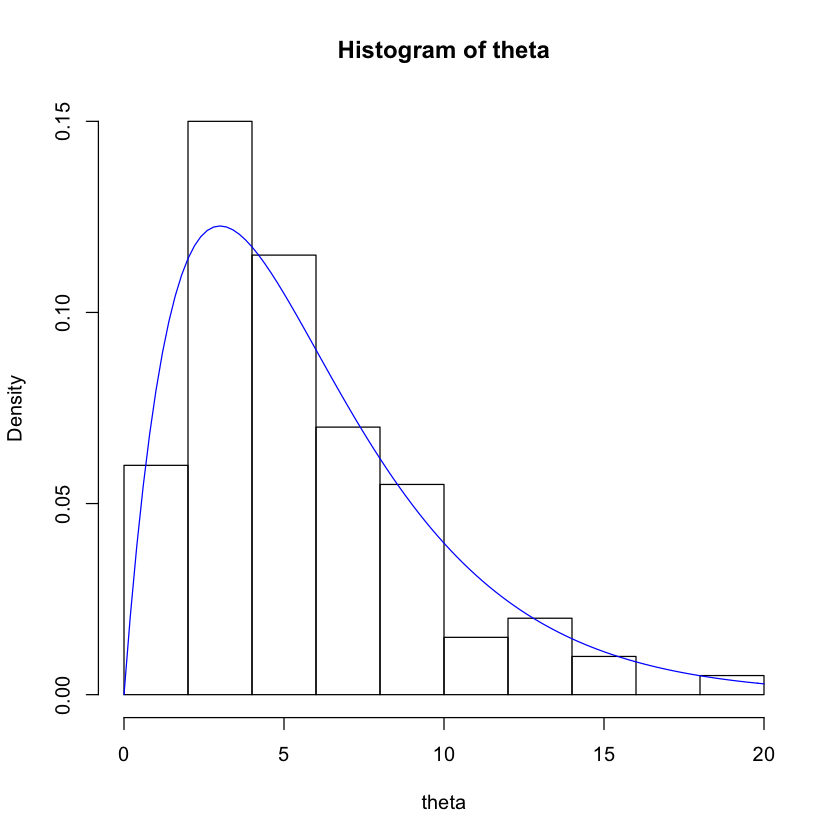

In [3]:
hist(theta, freq=FALSE)
curve(dgamma(x=x, shape=a, rate=b), col="blue", add=TRUE)

In [4]:
sum(theta) / m # sample mean

[1] 5.514068

In [5]:
mean(theta) # sample mean

[1] 5.514068

In [7]:
a / b # true expected value

[1] 6

In [8]:
m = 1e4
theta = rgamma(n=m, shape=a, rate=b)
mean(theta)

[1] 6.023273

In [9]:
var(theta) # sample variance

[1] 18.04318

In [10]:
a / b^2 # true variance of Gamma(a,b)

[1] 18

In [11]:
ind = theta < 5.0 # set of indicators, TRUE if theta_i < 5
mean(ind) # automatically converts FALSE/TRUE to 0/1

[1] 0.497

In [12]:
pgamma(q=5.0, shape=a, rate=b) # true value of Pr( theta < 5 )

[1] 0.4963317

In [13]:
quantile(x=theta, probs=0.9)

90% 
11.74338

In [14]:
qgamma(p=0.9, shape=a, rate=b) # true value of 0.9 quantile

[1] 11.66916

### Lesson 3.4
### Monte Carlo error

- We can use the CLT to approximate how accurate our Monte Carlo estimates are. For example, if we seek E(θ)E(θ), then the sample mean θ¯∗θ¯∗ approximately follows a normal distribution with mean E(θ)E(θ) and variance Var(θ)/mVar(θ)/m. 

- We will use the sample standard deviation divided by the square root of mm to approximate the Monte Carlo standard deviation.

In [15]:
se = sd(theta) / sqrt(m)
2.0 * se # we are reasonably confident that the Monte Carlo estimate is no more than this far from the truth

[1] 0.08495454

In [16]:
ind = theta < 5.0
se = sd(ind) / sqrt(m)
2.0 * se # we are reasonably confident that the Monte Carlo estimate is no more than this far from the truth

[1] 0.01000032

#### Marginalization
- Let’s also do the second example of simulating a hierarchical model. In our example from the previous segment, we had a binomial random variable where y∣ϕ∼iidBin(10,ϕ)y∣ϕ∼iidBin(10,ϕ), and ϕ∼Beta(2,2)ϕ∼Beta(2,2). To simulate from this joint distribution, repeat these steps for a large number mm:

- Simulate ϕiϕi from its Beta(2,2)Beta(2,2) distribution.
- Given the drawn ϕiϕi, simulate yiyi from Bin(10,ϕi)Bin(10,ϕi).

In [17]:
m = 10e4

y = numeric(m) # create the vectors we will fill in with simulations
phi = numeric(m)

for (i in 1:m) {
  phi[i] = rbeta(n=1, shape1=2.0, shape2=2.0)
  y[i] = rbinom(n=1, size=10, prob=phi[i])
}
# which is equivalent to the following 'vectorized' code
phi = rbeta(n=m, shape1=2.0, shape2=2.0)
y = rbinom(n=m, size=10, prob=phi)

In [18]:
mean(y)

[1] 5.00008

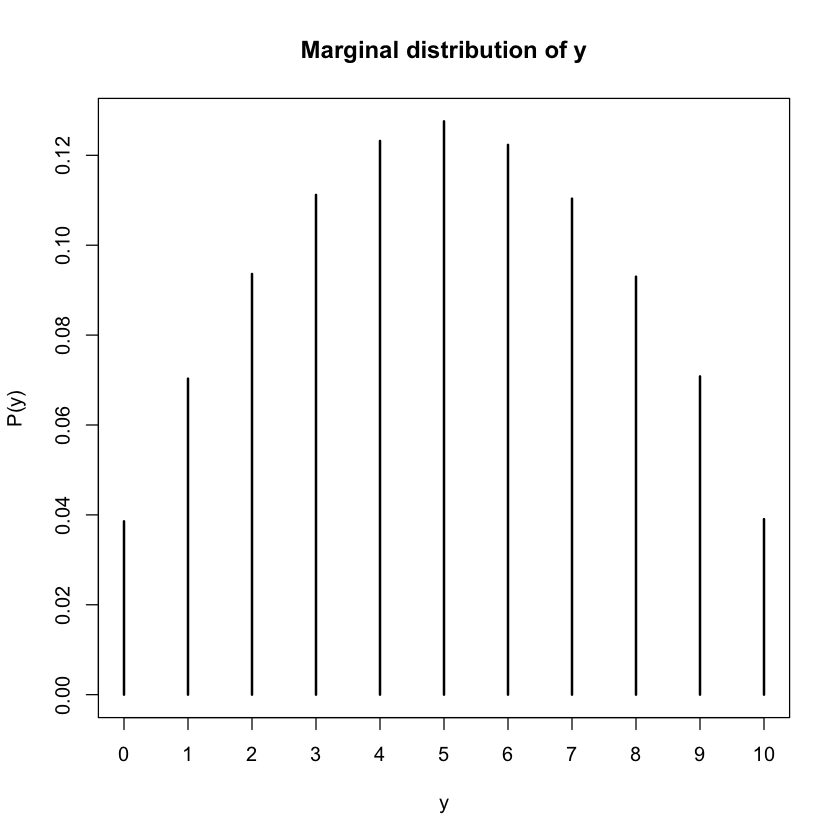

In [19]:
plot(prop.table(table(y)), ylab="P(y)", main="Marginal distribution of y")